g = [ 26.71428571  66.85714286 162.14285714]
X = [[ 52 100 170]
 [ 46  90 168]
 [ 28  85 168]
 [  2  12 110]
 [ 25  65 178]
 [ 21  65 172]
 [ 13  51 169]]
Xc = [[ 25.28571429  33.14285714   7.85714286]
 [ 19.28571429  23.14285714   5.85714286]
 [  1.28571429  18.14285714   5.85714286]
 [-24.71428571 -54.85714286 -52.14285714]
 [ -1.71428571  -1.85714286  15.85714286]
 [ -5.71428571  -1.85714286   9.85714286]
 [-13.71428571 -15.85714286   6.85714286]]
Xct = [[ 4.89219144  4.05336804  0.61704344]
 [ 3.73133245  2.83036906  0.45997784]
 [ 0.2487555   2.21886957  0.45997784]
 [-4.78163344 -6.70902296 -4.09492464]
 [-0.331674   -0.22712838  1.24530585]
 [-1.10557999 -0.22712838  0.77410904]
 [-2.65339197 -1.93932695  0.53851064]]


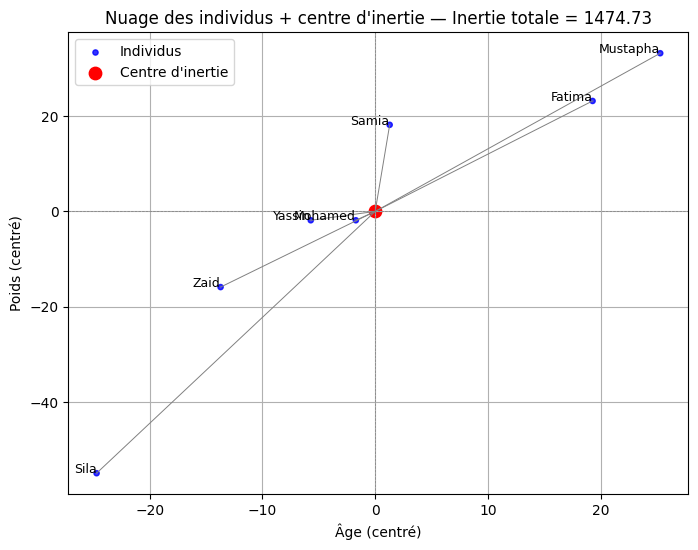

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("data/dataset_caracteristiques.csv")

# Séparer les noms et les données numériques
X = df[['Age', 'Poids', 'Taille']].values  # Données numériques
noms = df['Nom'].values                   # Noms
n, p = X.shape

# Poids uniformes
p_i = np.ones(n) / n
D = np.diag(p_i)

# Centre de gravité pondéré
g = X.T @ p_i  # moyenne pondérée (shape = (p,))

# Centrage pondéré
Xc = X - g  # shape = (n, p)
Xct = Xc / np.sqrt(g)

print(f'g = {g}')
print(f'X = {X}')
print(f'Xc = {Xc}')
print(f'Xct = {Xct}')

# Inertie totale
inertie_totale = np.sum(p_i * np.sum(Xc**2, axis=1))

# --- Visualisation 2D ---
plt.figure(figsize=(8, 6))
plt.scatter(Xc[:, 0], Xc[:, 1], s=100 * p_i, c='blue', alpha=0.8, label='Individus')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Tracer le centre (0,0 après centrage)
plt.scatter(0, 0, color='red', s=80, marker='o', label='Centre d\'inertie')

# Lignes des individus vers le centre
for i in range(n):
    plt.plot([Xc[i, 0], 0], [Xc[i, 1], 0], color='gray', linewidth=0.7)

# Ajouter noms
for i, nom in enumerate(noms):
    plt.text(Xc[i, 0], Xc[i, 1], nom, fontsize=9, ha='right')

plt.xlabel("Âge (centré)")
plt.ylabel("Poids (centré)")  # 1ʳᵉ et 2ᵉ variable
plt.title(f"Nuage des individus + centre d'inertie — Inertie totale = {inertie_totale:.2f}")
plt.grid(True)
plt.legend()
plt.show()


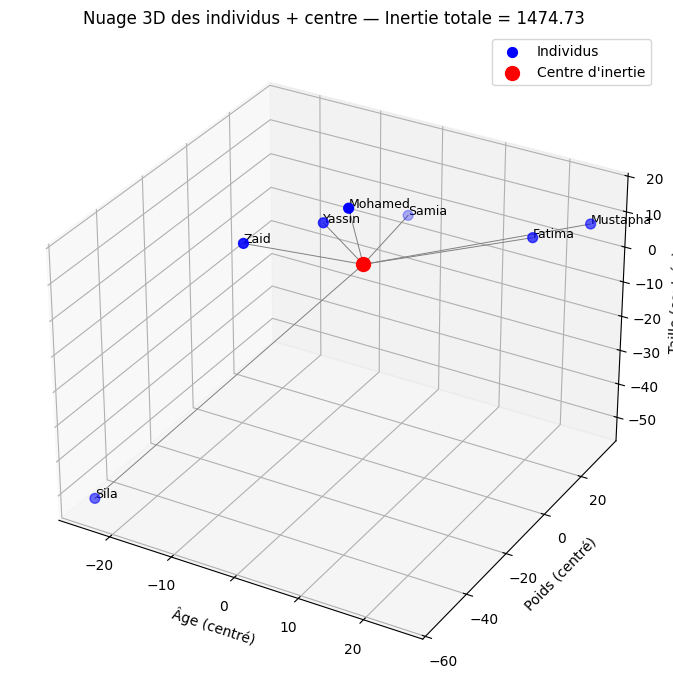

In [44]:
df = pd.read_csv("data/dataset_caracteristiques.csv")

# Extraire données numériques et noms
X = df[['Age', 'Poids', 'Taille']].values
noms = df['Nom'].values
n = len(noms)

# Centrage
g = X.mean(axis=0)
Xc = X - g  # données centrées

# Inertie totale (facultatif ici)
p_i = np.ones(n) / n
inertie_totale = np.sum(p_i * np.sum(Xc**2, axis=1))

# Tracé 3D avec centre et lignes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Nuage des individus
ax.scatter(Xc[:, 0], Xc[:, 1], Xc[:, 2], c='blue', s=50, label="Individus")

# Centre d'inertie
ax.scatter(0, 0, 0, color='red', s=100, label="Centre d'inertie")

# Lignes des individus vers le centre
for i in range(n):
    ax.plot([Xc[i, 0], 0], [Xc[i, 1], 0], [Xc[i, 2], 0], color='gray', linewidth=0.7)

# Ajouter les noms des individus
for i, nom in enumerate(noms):
    ax.text(Xc[i, 0], Xc[i, 1], Xc[i, 2], nom, fontsize=9)

# Axes
ax.set_xlabel("Âge (centré)")
ax.set_ylabel("Poids (centré)")
ax.set_zlabel("Taille (centrée)")
ax.set_title(f"Nuage 3D des individus + centre — Inertie totale = {inertie_totale:.2f}")
ax.legend()
plt.tight_layout()
plt.show()

In [45]:
sigma = Xc.T @ D @ Xc
print(f'la matrice Xc est:')
print(Xc)
print(f'la matrice sigma est:')
print(sigma)
print(f'trace de sigma:',np.trace(sigma))
print(f'la somme de Var(Xj):',np.sum(sigma.diagonal()))
print(f'g:',g)

la matrice Xc est:
[[ 25.28571429  33.14285714   7.85714286]
 [ 19.28571429  23.14285714   5.85714286]
 [  1.28571429  18.14285714   5.85714286]
 [-24.71428571 -54.85714286 -52.14285714]
 [ -1.71428571  -1.85714286  15.85714286]
 [ -5.71428571  -1.85714286   9.85714286]
 [-13.71428571 -15.85714286   6.85714286]]
la matrice sigma est:
[[263.91836735 413.53061224 204.32653061]
 [413.53061224 747.26530612 458.02040816]
 [204.32653061 458.02040816 463.55102041]]
trace de sigma: 1474.734693877551
la somme de Var(Xj): 1474.734693877551
g: [ 26.71428571  66.85714286 162.14285714]


Valeurs propres : [1287.47474268  173.91919817   13.34075303]
Vecteur propre de Y1 (α1) : [-0.40724473 -0.75164153 -0.51883209]
Variance expliquée par Y1 : 87.30212613990071 %
Scores Y1 :
[-39.28555971 -28.28801182 -17.19939896  78.35105699  -6.133155
  -1.39118354  13.94625203]


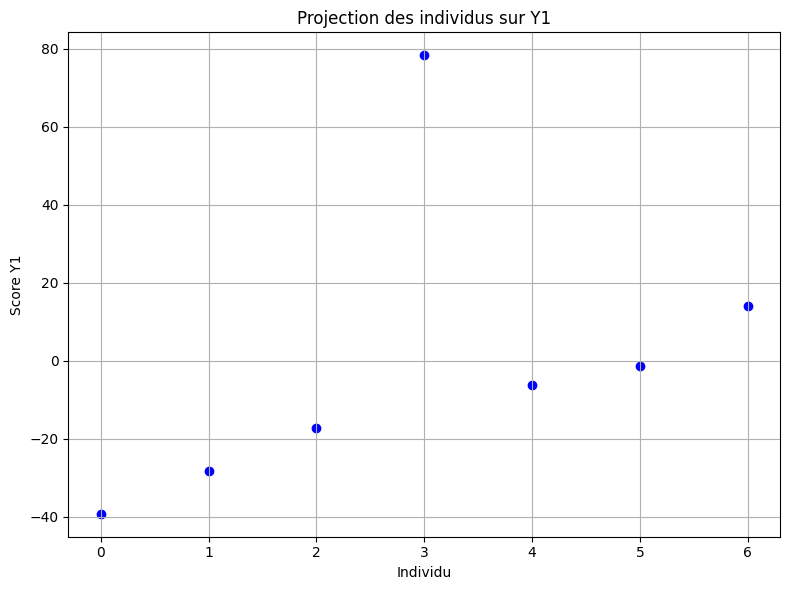

In [46]:
# Étape 1 : calcul des valeurs propres et vecteurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(sigma)

# Étape 2 : trier par ordre décroissant (important en ACP)
idx = np.argsort(valeurs_propres)[::-1]
valeurs_propres = valeurs_propres[idx]
vecteurs_propres = vecteurs_propres[:, idx]

# Étape 3 : proportion d'inertie (variance expliquée)
inertie_totale = np.sum(valeurs_propres)
proportions = valeurs_propres / inertie_totale

# Résultats
print("Valeurs propres :", valeurs_propres)
print("Vecteur propre de Y1 (α1) :", vecteurs_propres[:, 0])
print("Variance expliquée par Y1 :", proportions[0] * 100, "%")

# Calcul des scores Y1
Y1 = Xc @ vecteurs_propres[:, 0]
Y2 = Xc @ vecteurs_propres[:, 1]
print(f'Scores Y1 :\n{Y1}')

# Affichage avec noms
plt.figure(figsize=(8, 6))
plt.scatter(range(len(Y1)), Y1, color='blue')


plt.title("Projection des individus sur Y1")
plt.xlabel("Individu")
plt.ylabel("Score Y1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Calcule de Var(Y1).
print(f'Scores Y1 :\n{Y1}')
VarY1 = vecteurs_propres[:, 0].T @ sigma @ vecteurs_propres[:, 0]
print(f'Variance Y1:', VarY1)
print(f'Valeur propre lambda1:', valeurs_propres[0])
print(VarY1,' == ', valeurs_propres[0])
print(f' (t9riban) Var(Y1) == Lambda')
print(f'Norm v1:', vecteurs_propres[:, 0].T @ vecteurs_propres[:, 0])

Scores Y1 :
[-39.28555971 -28.28801182 -17.19939896  78.35105699  -6.133155
  -1.39118354  13.94625203]
Variance Y1: 1287.4747426778583
Valeur propre lambda1: 1287.4747426778574
1287.4747426778583  ==  1287.4747426778574
 (t9riban) Var(Y1) == Lambda
Norm v1: 1.0


In [54]:
print(f'Scores Y2 :\n{Y2}')
VarY2 = vecteurs_propres[:, 1].T @ sigma @ vecteurs_propres[:, 1]
print('Variance Y2:',VarY2)
print(f'Valeur propre lambda2:',valeurs_propres[1])
print(VarY2,' == ', valeurs_propres[1])
print(f'(exactly) Var(Y1) == Lambda')
print(f'Norm v1:', vecteurs_propres[:, 1].T @ vecteurs_propres[:, 1])
print(f'vectProp2T @ vectProp1:', vecteurs_propres[:, 1].T @ vecteurs_propres[:, 0])
print('That number is very clode to 0: 0.0000000000000002220446049250313')

Scores Y2 :
[-15.89810972 -11.60402551  -1.22245891 -14.14296556  14.35575152
  11.43066065  17.08114753]
Variance Y2: 173.91919817414177
Valeur propre lambda2: 173.91919817414177
173.91919817414177  ==  173.91919817414177
(exactly) Var(Y1) == Lambda
Norm v1: 0.9999999999999998
vectProp2T @ vectProp1: 2.220446049250313e-16
That number is very clode to 0: 0.0000000000000002220446049250313
